In [ ]:
#Importing necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [ ]:
#Loading the 'produce prices' dataset.
df = pd.read_csv("producePriceIndex.csv", header=0)
df.head()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
0,Strawberries,2019-05-19,$1.16,$2.23,$1.70,$1.99,$2.54,82.33%
1,Romaine Lettuce,2019-05-19,$0.35,$1.72,$2.00,$1.69,$1.99,428.57%
2,Red Leaf Lettuce,2019-05-19,$0.32,$1.84,$1.84,$1.69,$1.89,467.19%
3,Potatoes,2019-05-19,$1.50,$5.32,$5.14,$3.99,$6.22,244.50%
4,Oranges,2019-05-19,$0.41,$1.42,$1.45,$1.34,$2.05,281.71%


In [ ]:
df.tail()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
15761,Broccoli Crowns,1999-10-24,$0.29,$1.46,$0.00,$0.97,$1.15,208.62%
15762,Broccoli Bunches,1999-10-24,$0.23,$1.21,$0.00,$0.84,$1.10,242.39%
15763,Cauliflower,1999-10-24,$0.19,$1.01,$0.00,$0.75,$0.92,252.63%
15764,Carrots,1999-10-24,$0.12,$0.64,$0.00,$0.84,$0.59,331.25%
15765,Cantaloupe,1999-10-24,$0.21,$0.54,$0.00,$0.56,$0.79,125.00%


In [ ]:
df.describe()

,productname,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
count,15766,15766,15766,15766,15766,15766,15766,15766
unique,22,1019,316,528,458,436,406,10492
top,Broccoli Crowns,2012-08-12,$0.21,$1.32,$0.00,$0.99,$1.99,250.00%
freq,1017,37,408,243,1103,475,547,37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15766 entries, 0 to 15765
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   productname       15766 non-null  object
 1   date              15766 non-null  object
 2   farmprice         15766 non-null  object
 3   atlantaretail     15766 non-null  object
 4   chicagoretail     15766 non-null  object
 5   losangelesretail  15766 non-null  object
 6   newyorkretail     15766 non-null  object
 7   averagespread     15766 non-null  object
dtypes: object(8)
memory usage: 985.5+ KB


In [ ]:
df.isnull().sum()

,0
productname,0
date,0
farmprice,0
atlantaretail,0
chicagoretail,0
losangelesretail,0
newyorkretail,0
averagespread,0


In [ ]:
df.duplicated().sum()

51

In [ ]:
#Renaming the columns for reproducibility.
df.rename(columns = {'productname': 'Product Name', 'atlantaretail': 'Atlanta Retail', 'chicagoretail': 'Chicago Retail','losangelesretail': 'Los Angeles Retail', 'newyorkretail': 'New York Retail', 'farmprice': 'Farm Price', 'averagespread': 'Average Spread','date': 'Date'}, inplace=True)

In [ ]:
#Creating a list of columns with currency and assigning it to the columnsWithCurrency variable.
currency = ['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail', 'Farm Price']
columnsWithCurrency = currency

In [ ]:
#Converting currency to floats (removing the $ sign), percentage strings to numeric (removing the % sign), and date to datetime.
for col in columnsWithCurrency:
  df[col]=pd.to_numeric (df[col].replace('[\$,]', '', regex=True), errors='coerce')
df['Average Spread'] = pd.to_numeric(df['Average Spread'].replace('[\%,]','', regex=True), errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#Creating a list of city columns, looping through them to find $0.00 values, summing them and printing the results.
cities = ['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail']
zeroDollarProducts = 0
for city in cities:
    count = (df[city] == 0.00).sum()
    print(f'$0.00 values in {city} = {count}')
    zeroDollarProducts += count

print(f'$0.00 values dataset wide: {zeroDollarProducts}')

$0.00 values in Atlanta Retail = 193
$0.00 values in Chicago Retail = 1103
$0.00 values in Los Angeles Retail = 84
$0.00 values in New York Retail = 332
$0.00 values dataset wide: 1712


In [ ]:
#Imputing averages on zero or null values.
precondition = (df[cities] == 0.00) | (df[cities].isnull())
avgPrice = df[cities].mean(axis=1).round(2)
for column in cities:
    df.loc[precondition[column], column] = avgPrice

In [ ]:
df.drop_duplicates()

,Product Name,Date,Farm Price,Atlanta Retail,Chicago Retail,Los Angeles Retail,New York Retail,Average Spread
0,Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33
1,Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57
2,Red Leaf Lettuce,2019-05-19,0.32,1.84,1.84,1.69,1.89,467.19
3,Potatoes,2019-05-19,1.50,5.32,5.14,3.99,6.22,244.50
4,Oranges,2019-05-19,0.41,1.42,1.45,1.34,2.05,281.71
...,...,...,...,...,...,...,...,...
15761,Broccoli Crowns,1999-10-24,0.29,1.46,0.89,0.97,1.15,208.62
15762,Broccoli Bunches,1999-10-24,0.23,1.21,0.79,0.84,1.10,242.39
15763,Cauliflower,1999-10-24,0.19,1.01,0.67,0.75,0.92,252.63
15764,Carrots,1999-10-24,0.12,0.64,0.52,0.84,0.59,331.25


In [ ]:
df.dropna(inplace=True)

In [ ]:
#Creating a function to generate box plots.
def generateBoxPlot(data, labels, title, ylabel, figsize=(10, 6), rotation=45, grid=True):
    plt.figure(figsize=figsize)
    #To create the boxplot, enhance visualization and color in the box representing the IQR.
    plt.boxplot(data, labels=labels,boxprops=dict(facecolor = '#568203', color='black'), medianprops={'color': 'black'}, patch_artist=True)
    plt.xticks(rotation=rotation)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.gca().yaxis.set_major_formatter('${:.0f}'.format)

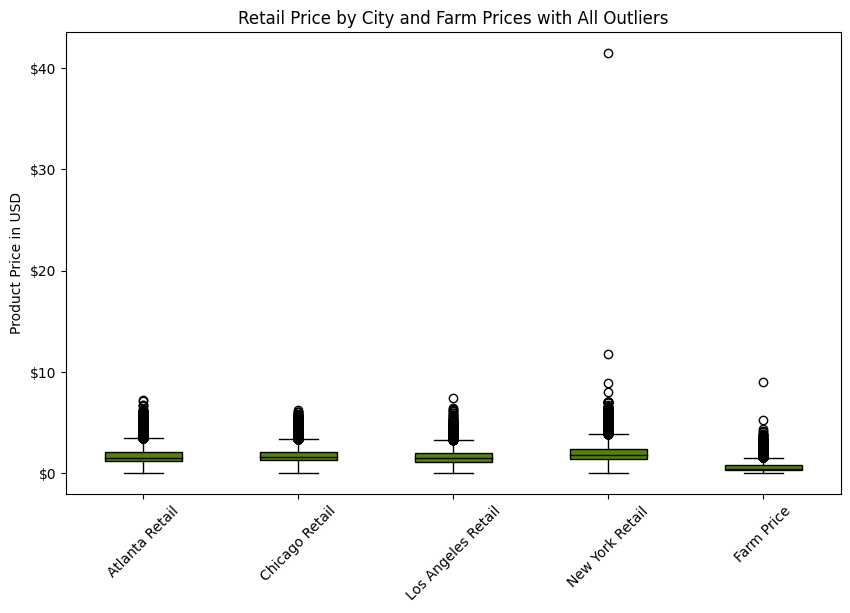

In [ ]:
#Plotting the distribution of price over city retail and farm price columns.
prices = df[['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail', 'Farm Price']]
generateBoxPlot([prices[col] for col in prices.columns], prices.columns, 'Retail Price by City and Farm Prices with All Outliers', 'Product Price in USD')

In [ ]:
#Locating the outlier by identifying the max value in the 'New York Retail' column.
maxValue = df['New York Retail'].max()
productName = df[df['New York Retail'] == maxValue]['Product Name']
print("The max value in 'New York Retail' is:", {maxValue}, "and this is the price for:", productName.values)

The max value in 'New York Retail' is: {41.49} and this is the price for: ['Red Leaf Lettuce']


In [ ]:
#Filtering out the row containing the outlier.
outliers = [41.49]
df1 = df[~df['New York Retail'].isin(outliers)]

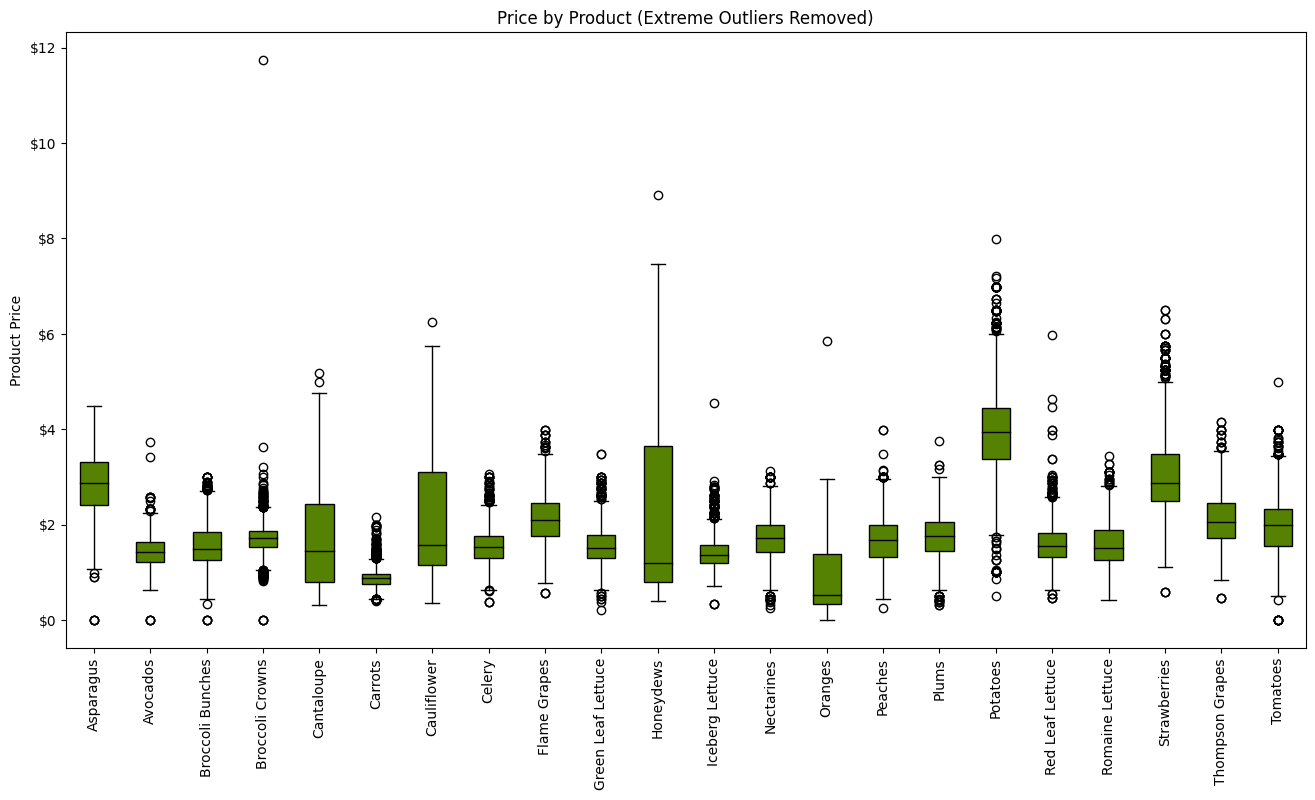

In [ ]:
#Generating a box plot of price by product with extreme outliers removed.
dfMelt1 = df1.melt(id_vars='Product Name', value_vars=['Atlanta Retail', 'Chicago Retail', 'Los Angeles Retail', 'New York Retail'], var_name='City', value_name='Price')
groupedList1 = dfMelt1.groupby('Product Name')['Price'].apply(list)
generateBoxPlot(groupedList1.values, groupedList1.index, 'Price by Product (Extreme Outliers Removed)', 'Product Price', figsize=(16, 8), rotation=90)

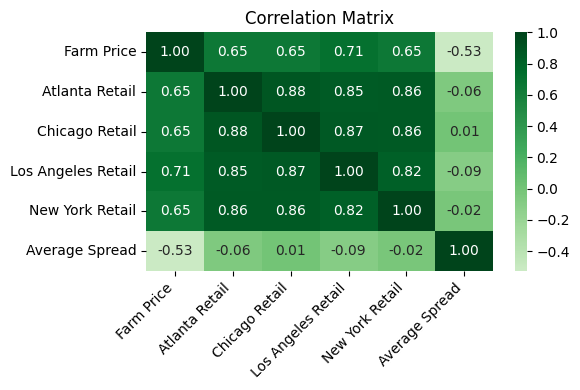

In [ ]:
#Creating a correlation matrix heatmap.
corrMat = df1.corr(numeric_only=True)
plt.figure(figsize=(6, 4 ))
sns.heatmap(corrMat, annot=True, fmt= ".2f",cmap='Greens', center=0)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
#Converting df2 to 'date' and indexing on 'date'
df2 = df1.copy()
df2['date'] = pd.to_datetime(df2['Date'])
#df2.set_index('date', inplace = True)
df2.set_index('Date', inplace = True)

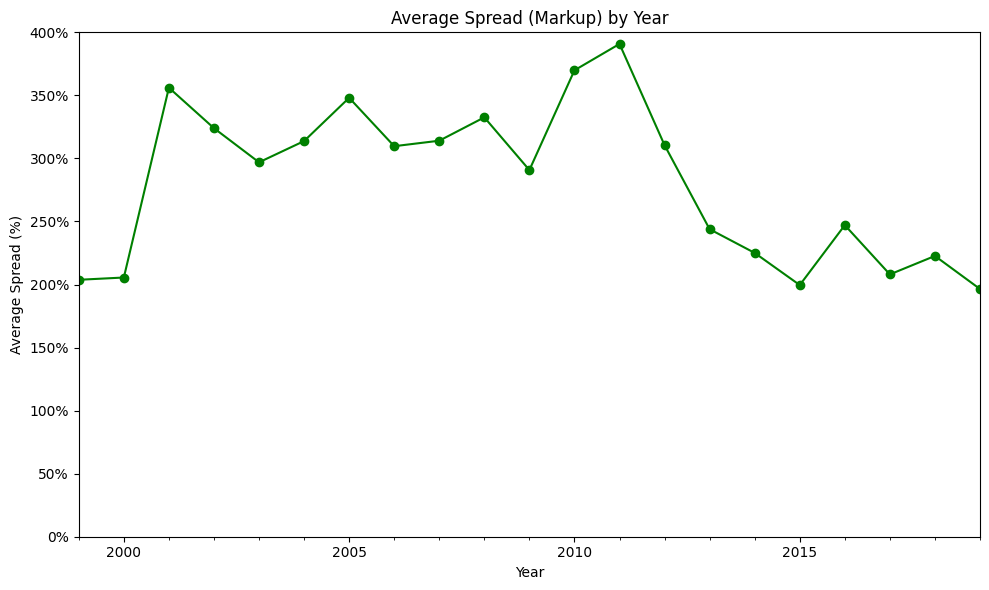

In [ ]:
#Plotting a line chart of average spread (markup) by year.
annualSpread = df2['Average Spread'].resample('A').mean()
plt.figure(figsize=(10, 6))
annualSpread.plot(marker='o', color='green', title='Average Spread (Markup) by Year')
plt.xlabel('Year')
plt.ylabel('Average Spread (%)')
plt.ylim(0, 400)
plt.gca().yaxis.set_major_formatter(PercentFormatter())
plt.tight_layout()
plt.show()

In [ ]:
#Defining a function to extract the season by month, then storing it in the dataframe df2.
def getSeason(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df2.loc[:, 'Season'] = df2['date'].apply(getSeason)

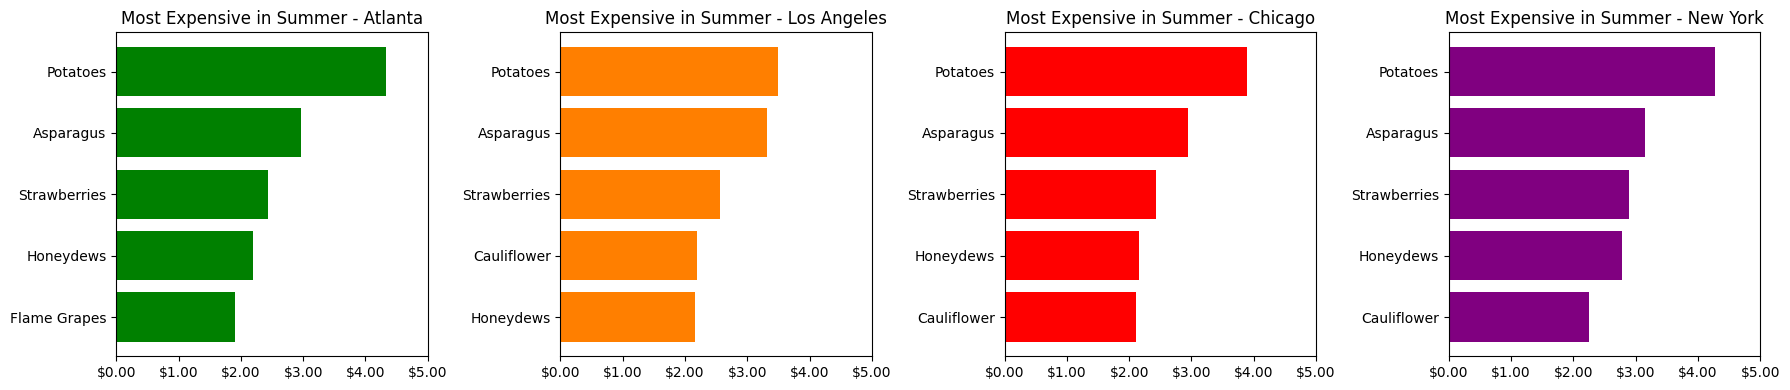

In [ ]:
#To create a bar chart of most expensive produce in the summer months by city.
selectSeason = 'Summer'
dataBySeason = df2[df2['Season'] == selectSeason]
cities = ['Atlanta Retail', 'Los Angeles Retail', 'Chicago Retail', 'New York Retail']
colors = ['green', '#FF7F00', 'red', 'purple']
fig, axes = plt.subplots(1, len(cities), figsize=(18, 4))
for i, city in enumerate(cities):
    top5 = dataBySeason.groupby('Product Name')[city].mean().nlargest(5).reset_index()
    cityName = city.replace(' Retail', '')
    axes[i].barh(top5['Product Name'], top5[city], color=colors[i])
    axes[i].set_xlim(0, 5)
    axes[i].set_title(f'Most Expensive in {selectSeason} - {cityName}')
    axes[i].xaxis.set_major_formatter('${:.2f}'.format)
    axes[i].invert_yaxis()
plt.tight_layout()
plt.show()

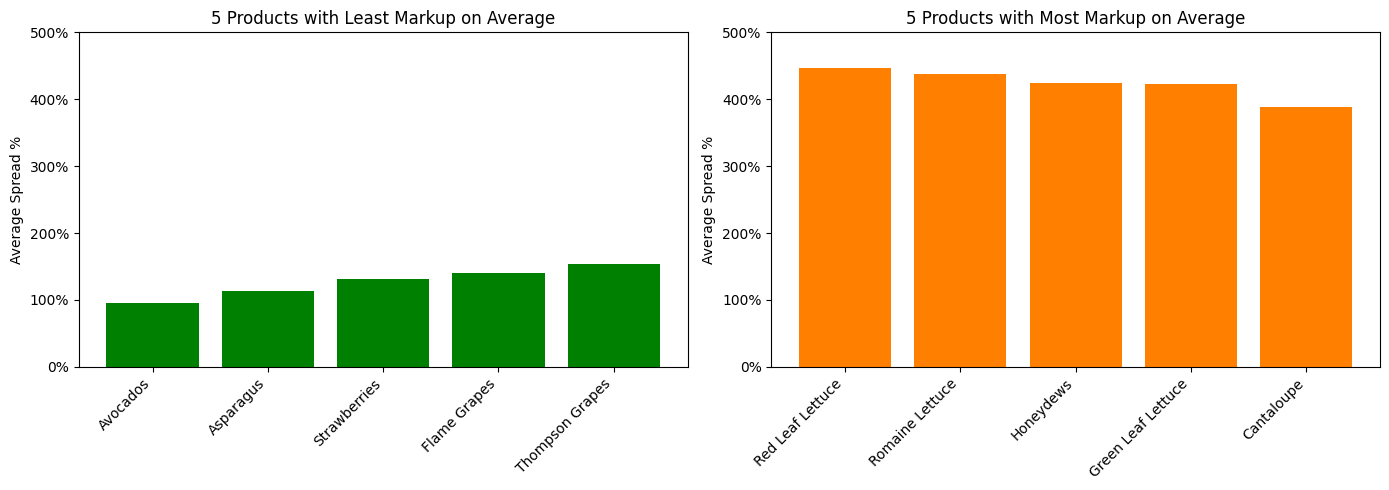

In [ ]:
#Defining a function to create side-by-side bar charts of the 5 products with most and least markup.
def createBarChart(data, title, color, ax):
  ax.bar(data['Product Name'], data['Average Spread'], color=color)
  ax.set_xticks(range(len(data['Product Name'])))
  ax.set_xticklabels(data['Product Name'], rotation=45, ha='right')
  ax.set_title(title)
  ax.set_ylabel ("Average Spread %")
  ax.set_ylim(0,500)
  ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}%'))
df3 = df2.groupby('Product Name')['Average Spread'].mean().reset_index()
productsWithLeastMarkup = df3.nsmallest(5, 'Average Spread')
productsWithMostMarkup = df3.nlargest(5, 'Average Spread')
fig, axs = plt.subplots(1,2, figsize=(14,5))
createBarChart(productsWithLeastMarkup, "5 Products with Least Markup on Average", 'green', axs[0])
createBarChart(productsWithMostMarkup, "5 Products with Most Markup on Average", '#FF7F00', axs[1])
plt.tight_layout()
plt.show()

Seasonality Exploration

In [ ]:
#Finding most and least expensive products by 'Farm Price' and storing them in variables.
avgPriceByProduct = df2.groupby('Product Name')['Farm Price'].mean()

mostExpProducts = avgPriceByProduct.nlargest(5).index
leastExpProducts = avgPriceByProduct.nsmallest(5).index

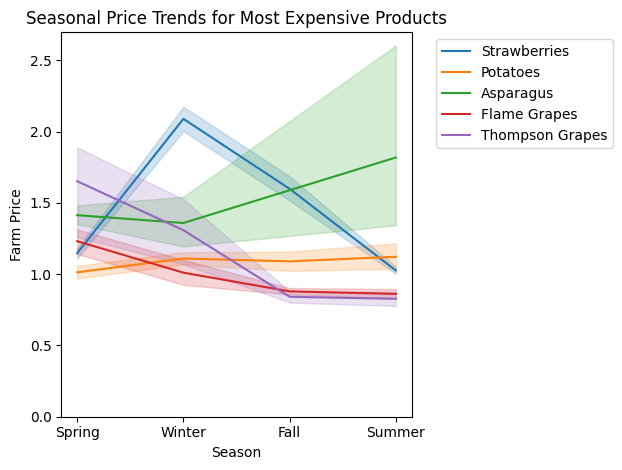

In [ ]:
#Visualizing most expensive products by 'Product Name' in a line chart.
mostExpDf = df2[df2['Product Name'].isin(mostExpProducts)]

sns.lineplot(data=mostExpDf, x='Season', y='Farm Price', hue='Product Name')
plt.title('Seasonal Price Trends for Most Expensive Products')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

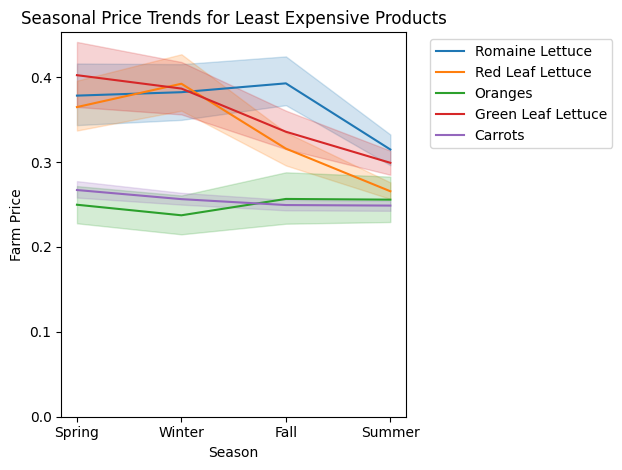

In [ ]:
#Visualizing least expensive products by 'Product Name' in a line chart.
leastExpDf = df2[df2['Product Name'].isin(leastExpProducts)]

sns.lineplot(data=leastExpDf, x='Season', y='Farm Price', hue='Product Name')
plt.title('Seasonal Price Trends for Least Expensive Products')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

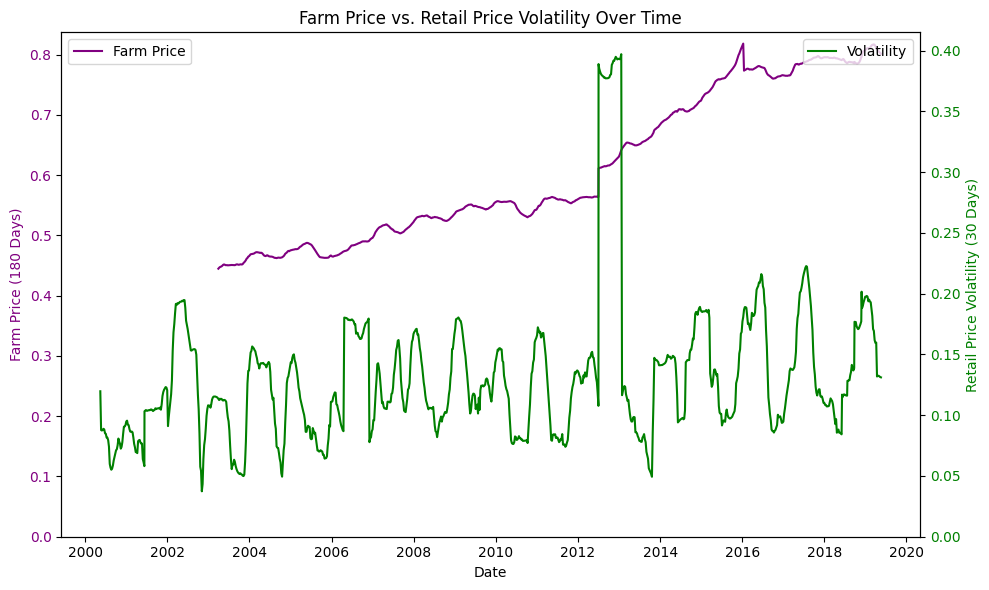

In [ ]:
#Crafting a visualization of rolling volatility over time for 'Farm Price' and retail prices.
groupByDateDf = df2.groupby('Date').agg({
    'Farm Price': 'mean',
    'Atlanta Retail': 'mean',
    'Los Angeles Retail': 'mean',
    'New York Retail': 'mean',
    'Chicago Retail': 'mean'
}).reset_index()

groupByDateDf['Rolling Farm Price (180 Days)'] = groupByDateDf['Farm Price'].rolling(window=180).mean()
groupByDateDf['Rolling Retail Volatility'] = groupByDateDf[['Atlanta Retail', 'Los Angeles Retail', 'New York Retail', 'Chicago Retail']].mean(axis=1).rolling(window=30).std()
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Farm Price (180 Days)', color='purple')
sns.lineplot(data=groupByDateDf, x='Date', y='Rolling Farm Price (180 Days)', ax=ax1, color='purple', label='Farm Price')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
ax2.set_ylabel('Retail Price Volatility (30 Days)', color='green')
sns.lineplot(data=groupByDateDf, x='Date', y='Rolling Retail Volatility', ax=ax2, color='green', label='Volatility')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(bottom=0)

plt.title('Farm Price vs. Retail Price Volatility Over Time')
fig.tight_layout()
plt.show()

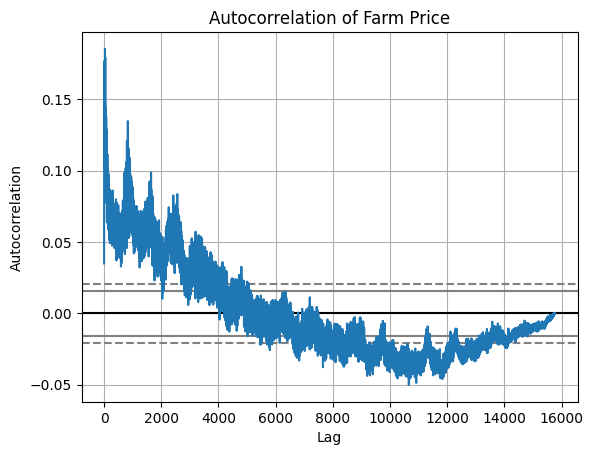

In [ ]:
#Creating an autocorrelation plot.
fig, ax = plt.subplots()
autocorrelation_plot(df['Farm Price'], ax=ax)
plt.title('Autocorrelation of Farm Price', color='black')
plt.show()

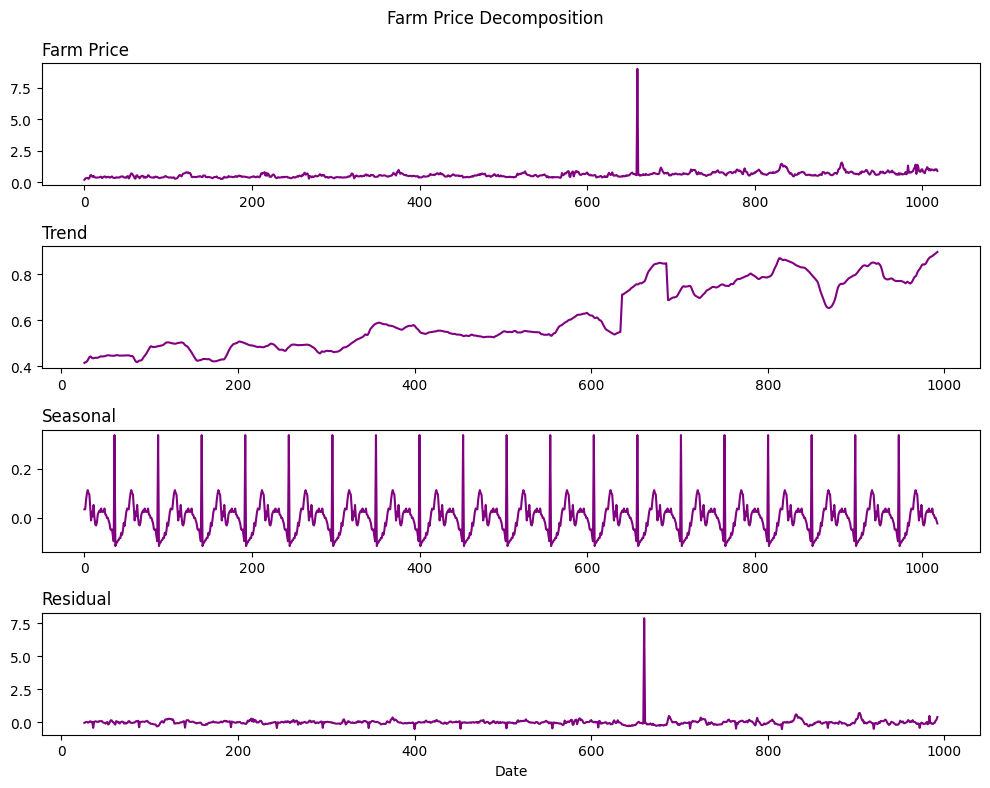

In [ ]:
# Exploring seasonal decomposition.
result = seasonal_decompose(groupByDateDf['Farm Price'], model='additive', period=52)

fig, axes = plt.subplots(4, 1, figsize=(10, 8))
components = [result.observed, result.trend, result.seasonal, result.resid]
titles = ['Farm Price', 'Trend', 'Seasonal', 'Residual']

for i, (ax, component, title) in enumerate(zip(axes, components, titles)):
    ax.plot(component, color='purple')
    ax.set_title(title, loc='left', color='black')
    if i == 3:
        ax.set_xlabel('Date')

plt.suptitle('Farm Price Decomposition', color='black')
plt.tight_layout()
plt.show()